## **Softmax Regression With MNIST**

### Imports

In [2]:
# common imports
import numpy as np
from pprint import pprint

# to make this notebook's output stable across runs
np.random.seed(42)

# sklearn imports

# Data Fetching
from sklearn.datasets import fetch_openml

# Feature Scaling
from sklearn.preprocessing import StandardScaler

# Pipeline Utility
from sklearn.pipeline import Pipeline

# Classifiers
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

# Evaluation Metrics
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, f1_score, make_scorer

# To Plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# global settings
mpl.rc('axes', labelsize = 14)
mpl.rc('xtick', labelsize = 12)
mpl.rc('ytick', labelsize = 12)
mpl.rc('figure', figsize = (8,6))

### Data Loading

In [ ]:
X, y = fetch_openml('mnist_784', version = 1, return_X_y = True)

### Training-test Split

In [5]:
X = X.to_numpy()
y = y.to_numpy()

x_train, y_train, x_test, y_test = X[:60000], y[:60000].astype(np.int8), X[60000:], y[60000:].astype(np.int8)

### Model Building

In [ ]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(multi_class = 'multinomial', solver = 'sag'))   # setting multi_class = 'multinomial' in Logistic regression means using Softmax
])

pipe.fit(x_train, y_train)

In [7]:
pipe[-1].coef_.shape

(10, 784)

In [8]:
pipe[-1].intercept_.shape

(10,)

In [9]:
pipe[-1].classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

### Model Evaluation

In [10]:
y_pred = pipe.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.94      0.90      0.92      1032
           3       0.91      0.91      0.91      1010
           4       0.92      0.94      0.93       982
           5       0.91      0.87      0.89       892
           6       0.93      0.95      0.94       958
           7       0.92      0.93      0.92      1028
           8       0.88      0.88      0.88       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



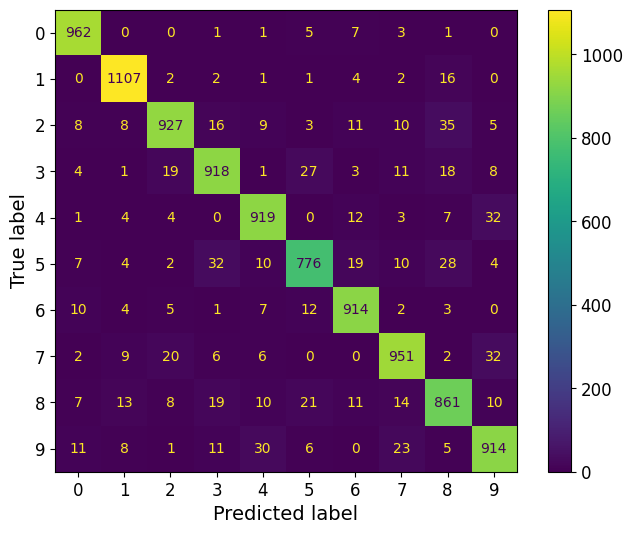

In [11]:
ConfusionMatrixDisplay.from_estimator(pipe, x_test, y_test)
plt.show()

### Using LogisticRegressionCV

In [ ]:
scorer = make_scorer(f1_score, average = 'micro')

pipeCV = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegressionCV(cv = 5, multi_class = 'multinomial', solver = 'sag', scoring = scorer, max_iter = 100, random_state = 1729))   # setting multi_class = 'multinomial' in Logistic regression means using Softmax
])

pipeCV.fit(x_train, y_train)

In [ ]:
pipe[-1].C_

In [ ]:
pipe[-1].l1_ratio_

In [ ]:
y_predict = pipeCV.predict(x_test)

print(classification_report(y_test, y_predict))

In [ ]:
ConfusionMatrixDisplay.from_estimator(pipe, x_test, y_test)
plt.show()

## **K-Nearest Neighbors**

### Nearest Neighbor Classifier

## **Support Vector Machines**